# Projeto Base RH

Utilizei um dataset fictício disponibilizado pela 'Dataside' com dados de funcionários com categorias de salário, admissão, função, nivel de escolaridade e experiência na área.

In [16]:
# Importando as bibliotecas necessárias

# Bibliotecas para modelagem e matrizes
import pandas as pd
import numpy as np

# Bibliotecas para análises gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Biblioteca para ignorar avisos
import warnings

# Desativando avisos
warnings.filterwarnings('ignore')

In [2]:
# Lendo arquivo

dados = pd.read_excel('BaseRH.xlsx', index_col=0)

dados.head()

,colaborador,genero,data_nascimento,data_de_admissao,Unnamed: 5,escolaridade,cargo,setor,salario,hoje,xp
ID,,,,,,,,,,,
1,Leila Diniz,Feminino,1989-08-17,2011-10-02,NaN,Ensino técnico,Administrador,Administrativo,4500,2022-11-16,11.131507
3,Margaret Thatcher,Feminino,1981-04-18,2012-08-24,NaN,Superior incompleto,Analista Administrativo,Administrativo,1900,2022-11-16,10.235616
41,Cicero L. Lima,Masculino,1983-01-28,2013-12-19,NaN,Mestre,Analista Administrativo,Administrativo,1900,2022-11-16,8.915068
4,Eva Perón,Feminino,2002-10-31,2012-11-12,NaN,Superior completo,Analista Contábil,Administrativo,2200,2022-11-16,10.016438
42,Caio Soares Modesto,Masculino,1991-06-10,2014-02-20,NaN,Doutor,Analista Contábil,Administrativo,2200,2022-11-16,8.742466


In [3]:
# Veriquei que a coluna 'Unnamed: 5' apresenta apenas valores nulos, por isso resolve remove-la
dados = dados.dropna(axis=1)

In [4]:
# Verificando se ainda existem campos nulos

dados.isnull().sum()

colaborador         0
genero              0
data_nascimento     0
data_de_admissao    0
escolaridade        0
cargo               0
setor               0
salario             0
hoje                0
xp                  0
dtype: int64

In [5]:
# Dimensão
dados.shape

(90, 10)

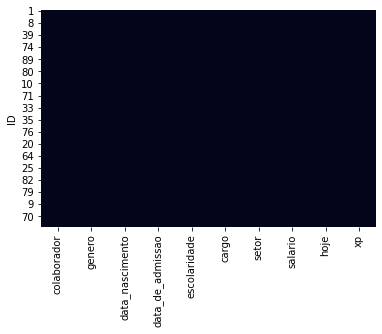

In [6]:
# Grafico dos nulos
sns.heatmap(dados.isnull(), cbar=False);

In [7]:
# Análise estatística
dados.describe()

,salario,xp
count,90.000000,90.000000
mean,3716.822222,6.466423
std,1707.422254,2.218326
min,190.000000,2.923288
25%,2890.000000,4.632877
50%,3900.000000,6.534247
75%,4218.750000,7.814384
max,9000.000000,11.772603


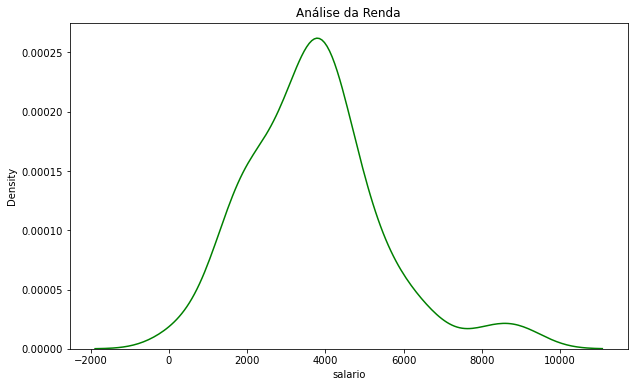

In [8]:
# Plotando um gráfico com coluna 'salario'
plt.figure(figsize=(10,6))
plt.title('Análise da Renda')
sns.kdeplot(dados['salario'], color='green');

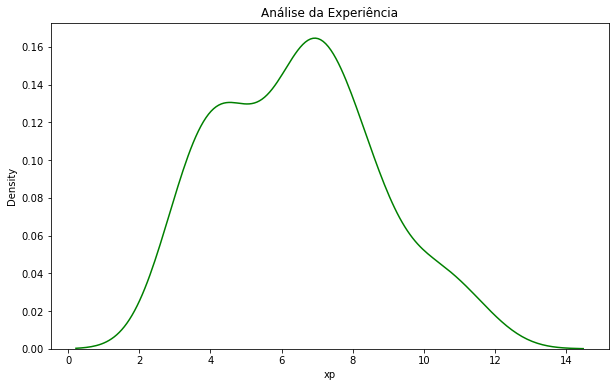

In [9]:
# Plotando um gráfico com coluna 'xp'
plt.figure(figsize=(10,6))
plt.title('Análise da Experiência')
sns.kdeplot(dados['xp'], color='green');

<AxesSubplot:xlabel='salario', ylabel='xp'>

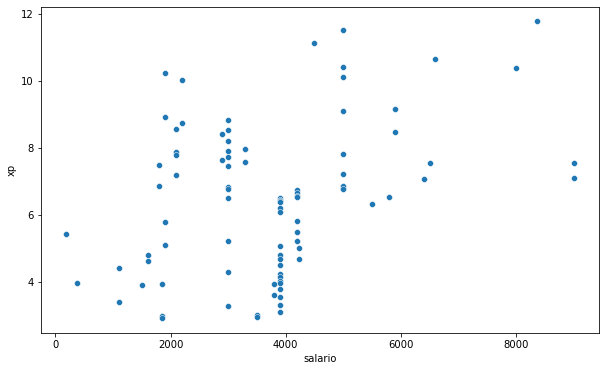

In [10]:
# Plotando um gráfico simples de distribuição para entendermos a correlação entre xp e salário
plt.figure(figsize=(10,6))
sns.scatterplot(data=dados, x='salario', y='xp')

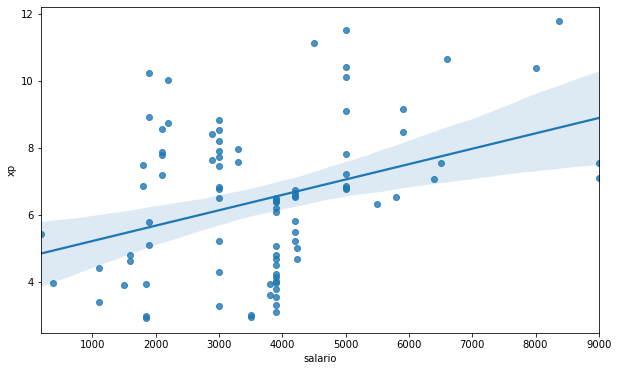

In [11]:
# Linha de Regressão
plt.figure(figsize=(10,6))
sns.regplot(data=dados, x='salario', y='xp');

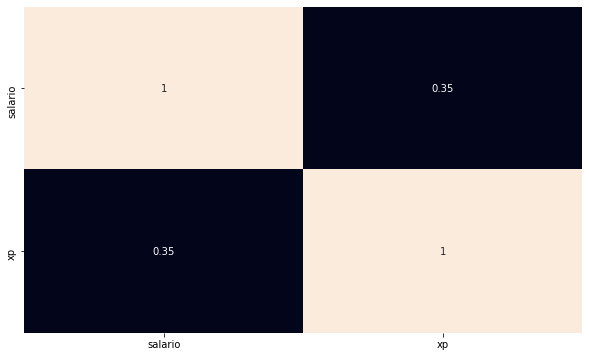

In [12]:
# Verificando a correlação das variáveis
plt.figure(figsize=(10,6))
correlacao = dados.corr()
sns.heatmap(correlacao, annot=True, cbar=False);

Analisando a primeira parte do estudo, foi verificado que o grau de correlação entre salárioe xp é mais próximo do zero, por isso não necessariamente o quanto mais tempo de experiência, maior o salário.

Por esse motivo, decidi fazer uma segunda parte do estudo verificando se o grau de instrução das pessoas tem um peso maior no valor dos salários.

In [13]:
# Verificando os valores únicos da coluna 'escolaridade'
dados['escolaridade'].unique()

array(['Ensino técnico', 'Superior incompleto', 'Mestre',
       'Superior completo', 'Doutor', 'Especialização', 'Pós graduação'],
      dtype=object)

In [14]:
# Categorizando os niveis de escolaridade de 1 a 7

dados['escolaridade_nivel'] = dados.escolaridade.map({'Ensino técnico':1, 'Superior incompleto':2, 'Mestre':3, 'Superior completo':4, 'Doutor':5,
                                                   'Especialização':6, 'Pós graduação':7})
dados.head(10)

,colaborador,genero,data_nascimento,data_de_admissao,escolaridade,cargo,setor,salario,hoje,xp,escolaridade_nivel
ID,,,,,,,,,,,
1,Leila Diniz,Feminino,1989-08-17,2011-10-02,Ensino técnico,Administrador,Administrativo,4500,2022-11-16,11.131507,1
3,Margaret Thatcher,Feminino,1981-04-18,2012-08-24,Superior incompleto,Analista Administrativo,Administrativo,1900,2022-11-16,10.235616,2
41,Cicero L. Lima,Masculino,1983-01-28,2013-12-19,Mestre,Analista Administrativo,Administrativo,1900,2022-11-16,8.915068,3
4,Eva Perón,Feminino,2002-10-31,2012-11-12,Superior completo,Analista Contábil,Administrativo,2200,2022-11-16,10.016438,4
42,Caio Soares Modesto,Masculino,1991-06-10,2014-02-20,Doutor,Analista Contábil,Administrativo,2200,2022-11-16,8.742466,5
8,Simone de Beauvoir,Feminino,1996-09-20,2014-05-08,Especialização,Analista de Departamento Pessoal,Administrativo,3000,2022-11-16,8.531507,6
46,Flávio Alberto,Masculino,1982-11-12,2015-02-26,Superior completo,Analista de Departamento Pessoal,Administrativo,3000,2022-11-16,7.726027,4
16,Madame Curie,Feminino,1990-06-19,2015-05-21,Ensino técnico,Analista Financeiro,Administrativo,1800,2022-11-16,7.495890,1
54,Lucas Amado,Masculino,1993-06-20,2016-01-06,Pós graduação,Analista Financeiro,Administrativo,1800,2022-11-16,6.865753,7


<AxesSubplot:xlabel='salario', ylabel='escolaridade_nivel'>

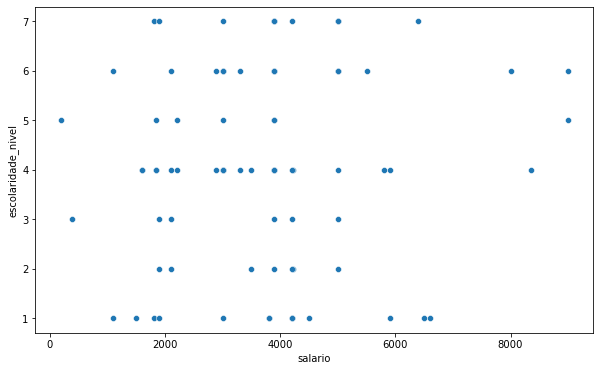

In [21]:
# Plotando um gráfico simples de distribuição para entendermos a correlação entre xp e salário
plt.figure(figsize=(10,6))
sns.scatterplot(data=dados, x='salario', y='escolaridade_nivel')

In [22]:
dados.corr()

,salario,xp,escolaridade_nivel
salario,1.000000,0.353529,0.097782
xp,0.353529,1.000000,0.046676
escolaridade_nivel,0.097782,0.046676,1.000000


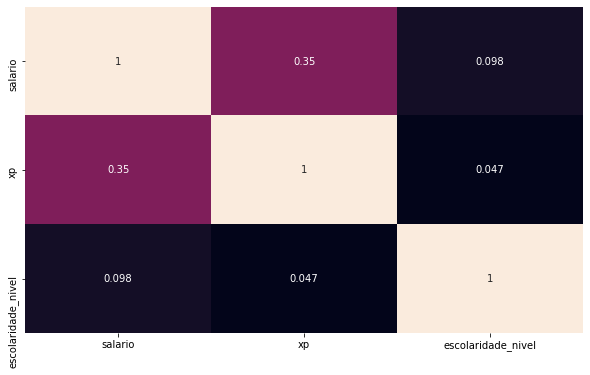

In [23]:
# Criando uma matriz de correlação agora também com a variável 'escolaridade'

plt.figure(figsize=(10,6))
correlacao2 = dados.corr()
sns.heatmap(correlacao2, annot=True, cbar=False);

# Resultado do Estudo

 - Pelo nosso resultado da matriz de correlação, podemos afirmar que  por muitas vezes que correlação não é causalidade, embora nosso estudo demonstre que exista uma tendência maior de que quanto maior o nível de escolaridade, maior é o salário do colaborador, empresas que geralmente não possuem um plano de cargos e salários bem definidos acabam 'perdidas' na definicação das regras entre o que deve ser pago a cada colaborador de acordo com os anos de casa com seu nível de escolaridade.
